# The goal

The goal is ...

In [5]:
# Import the required Python packages
import numpy as np
import matplotlib.pyplot as plt

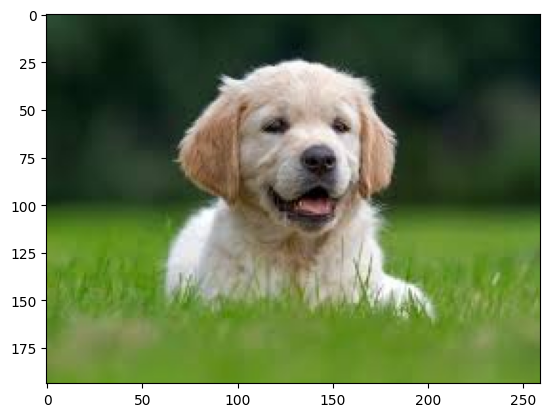

In [6]:
# Display the image from the specified path
img = plt.imread('images/01-dog.jpeg')
plt.imshow(img)
plt.show()

## What is an edge?

An edge occurs where there is a sudden change in pixel intensity

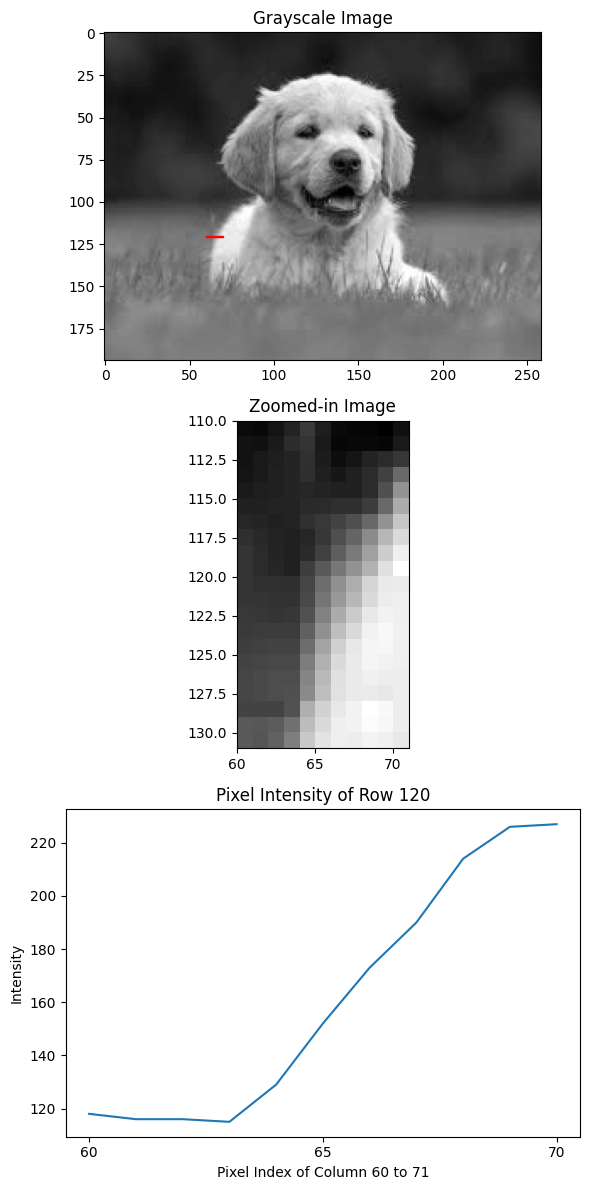

In [7]:
# Convert the image to grayscale
## Extract the Red, Green, and Blue channels
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
## Apply the grayscale conversion formula
## Based on https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html#color_convert_rgb_gray
gray_img = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# Select a row to plot the pixel intensity
row_index = 120
col_start = 60
width = 10
col_end = col_start + width + 1

# Extract the zoomed-in region from the grayscale image
zoom_row_start = row_index - 10
zoom_row_end = row_index + 10 + 1
zoom_col_start = col_start
zoom_col_end = col_end
zoomed_img = gray_img[zoom_row_start:zoom_row_end, zoom_col_start:zoom_col_end]

pixel_intensity = gray_img[row_index, col_start:col_end]

# Plot the grayscale image and pixel intensity side by side
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Display the grayscale image
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Grayscale Image')
patch = plt.Rectangle((col_start, row_index), width, 1, color='red', fill=False)
axes[0].add_patch(patch)

# Display the zoomed-in image
axes[1].imshow(zoomed_img, cmap='gray', extent=(col_start, col_end, zoom_row_end, zoom_row_start))
axes[1].set_title('Zoomed-in Image')

# Plot the pixel intensity
axes[2].plot(pixel_intensity)
axes[2].set_title(f'Pixel Intensity of Row {row_index}')
# Set custom x-axis labels
xticks = range(0, len(pixel_intensity), 5)
axes[2].set_xticks(xticks)
axes[2].set_xticklabels(range(col_start, col_end, 5))
axes[2].set_xlabel(f'Pixel Index of Column {col_start} to {col_end}')
axes[2].set_ylabel('Intensity')

plt.tight_layout()
plt.show()

## Why use first derivative to show an edge?

### Understanding Image Edges
An edge in an image represents a significant change in pixel intensity. This change can be due to various factors like changes in color, texture, or brightness. Detecting these edges is crucial for many image processing tasks, such as object detection, image segmentation, and more.

### First Derivative and Edge Detection
The first derivative of a function measures the rate of change of that function. When applied to an image, the first derivative measures the rate of change of pixel intensities. Here's why this is useful for edge detection:

1. Constant Regions: In regions where the pixel intensity is constant (i.e., no change), the first derivative will be zero.
2. Gradual Changes: In regions where the pixel intensity changes gradually, the first derivative will have small values.
3. Sharp Changes (Edges): At points where there is a sudden change in pixel intensity (i.e., an edge), the first derivative will have a large value.

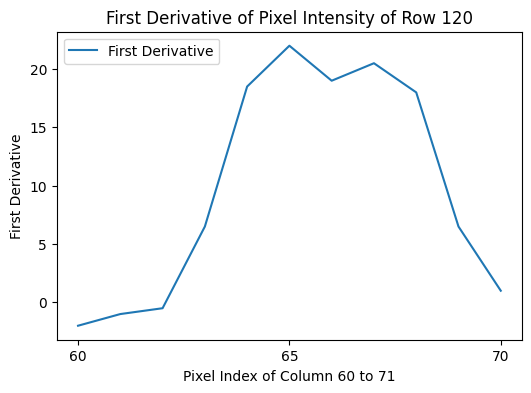

In [10]:
# Compute the first derivative of the pixel intensity
first_derivative = np.gradient(pixel_intensity)

# Plot the first derivative
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(first_derivative, label='First Derivative')
ax.set_title(f'First Derivative of Pixel Intensity of Row {row_index}')
# Set custom x-axis labels
xticks = range(0, len(pixel_intensity), 5)
ax.set_xticks(xticks)
ax.set_xticklabels(range(col_start, col_end, 5))
ax.set_xlabel(f'Pixel Index of Column {col_start} to {col_end}')
ax.set_ylabel('First Derivative')
ax.legend()
plt.show()